In [ ]:
!!pip install meteostat pandas
!pip install matplotlib

In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd
from meteostat import Point, Daily

In [ ]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

# Define the location (latitude, longitude, and elevation)
location = Point(22.3193, 114.1694, 0)  # Example: Hong Kong

# Define the time range
start_date = datetime(1990, 1, 1)
end_date = datetime(2024, 12, 31)

# Fetch daily weather data
data = Daily(location, start_date, end_date)
data = data.fetch()

# Aggregate to yearly summary
yearly_data = data.resample('YE').agg({
    'tavg': 'mean',  # Average temperature
    'tmin': 'min',   # Minimum temperature
    'tmax': 'max',   # Maximum temperature
    'prcp': 'sum',   # Total precipitation
    'snow': 'sum',   # Total snowfall
    'wspd': 'mean',  # Average wind speed
    'pres': 'mean'   # Average pressure
})

# Display the data
print(yearly_data)

                 tavg  tmin  tmax    prcp  snow       wspd         pres
time                                                                   
1990-12-31  23.722466   7.0  36.3    45.0   0.0  15.827901         <NA>
1991-12-31   24.11456   5.0  37.0    35.9   0.0  14.275623         <NA>
1992-12-31  23.580495   8.1  36.0  3534.4   0.0  14.413521         <NA>
1993-12-31  23.692857   6.0  34.0  1811.5   0.0  14.185196         <NA>
1994-12-31  24.226374   7.4  35.0  2233.5   0.0  14.603933         <NA>
1995-12-31   23.33489  -2.7  34.5  2251.7   0.0  14.866667         <NA>
1996-12-31  23.848907   7.0  37.0  2059.7   0.0  13.766759         <NA>
1997-12-31  24.025549   9.7  35.0  3187.7   0.0  13.041274         <NA>
1998-12-31  24.493132   9.0  35.0  2559.9   0.0   13.04382         <NA>
1999-12-31  24.166116   8.8  36.0   103.9   0.0  13.558873         <NA>
2000-12-31  24.019399   0.3  35.0   153.1   0.0  13.533699         <NA>
2001-12-31  24.184573   9.7  35.0     0.0   0.0  15.101923  1004

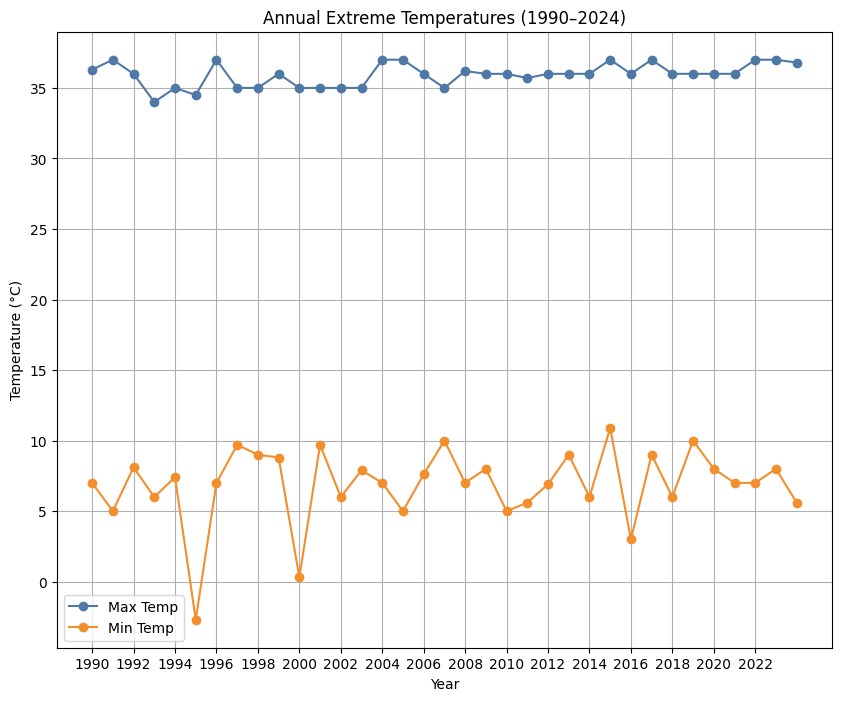

In [ ]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

yearly_extremes = yearly_data.groupby(yearly_data.index.year).agg({'tmax': 'max', 'tmin': 'min'}).reset_index()

plt.figure(figsize=(10, 8))
plt.plot(yearly_extremes['time'], yearly_extremes['tmax'], label='Max Temp', color='#4e79a7', marker='o')
plt.plot(yearly_extremes['time'], yearly_extremes['tmin'], label='Min Temp', color='#f28e2c', marker='o')
plt.title('Annual Extreme Temperatures (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(range(1990, 2024, 2))  # Adjust x-axis ticks for clarity
plt.show()



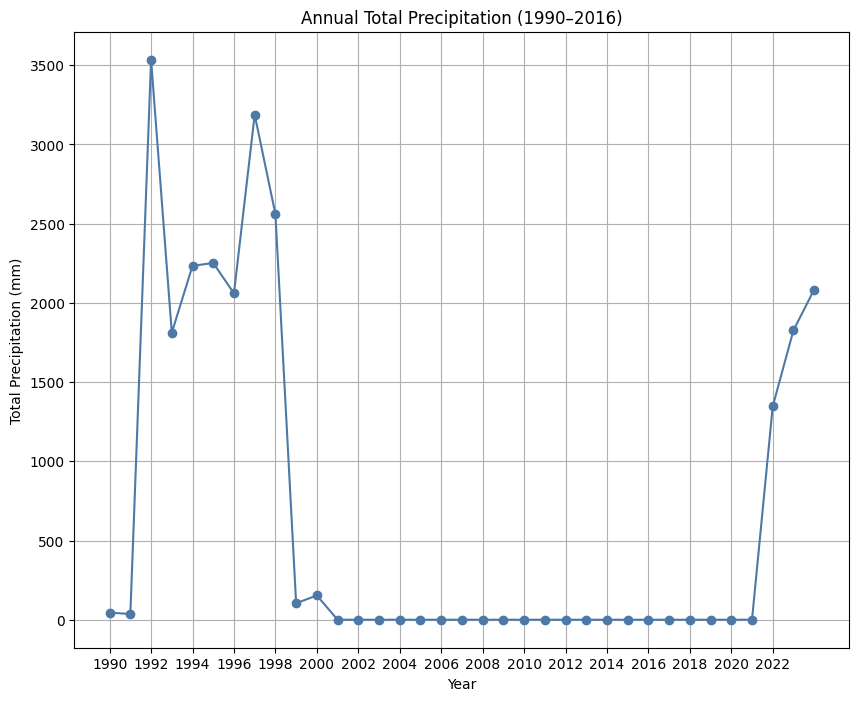

In [ ]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

yearly_prcp = yearly_data.groupby(yearly_data.index.year)['prcp'].sum().reset_index(name='total_prcp')

plt.figure(figsize=(10, 8))
plt.plot(yearly_prcp['time'], yearly_prcp['total_prcp'], color='#4e79a7', marker='o')
plt.title('Annual Total Precipitation (1990–2016)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.xticks(range(1990, 2024, 2))
plt.show()

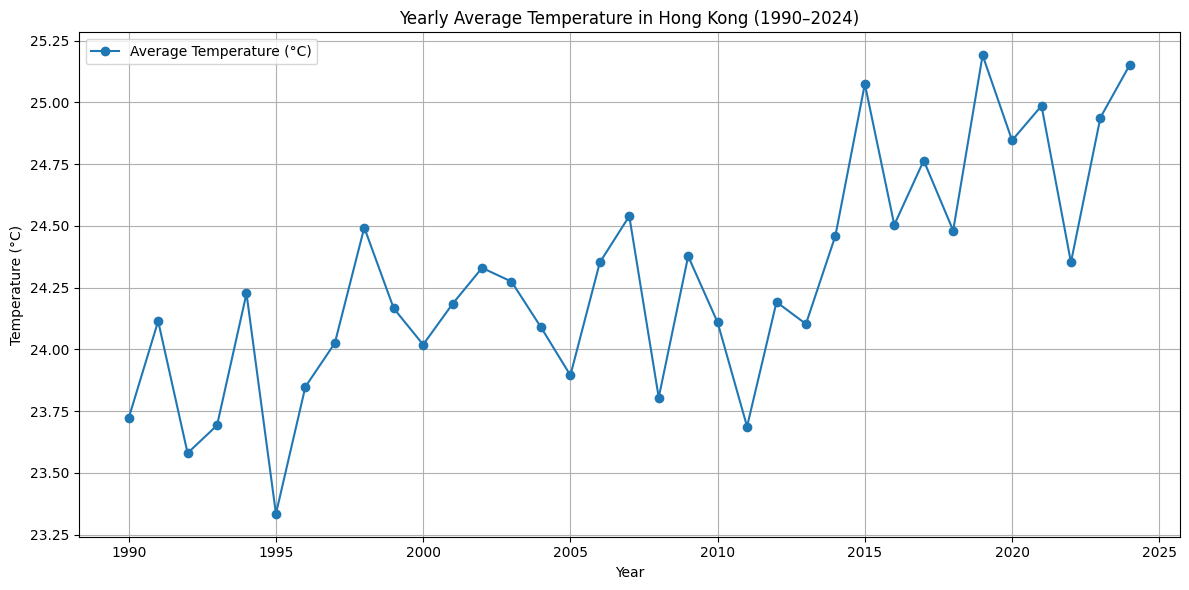

In [ ]:
import matplotlib.pyplot as plt

# 設定圖表大小
plt.figure(figsize=(12, 6))

# 畫出平均氣溫折線圖
plt.plot(yearly_data.index.year, yearly_data['tavg'], marker='o', label='Average Temperature (°C)')

# 加上標題與標籤
plt.title('Yearly Average Temperature in Hong Kong (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


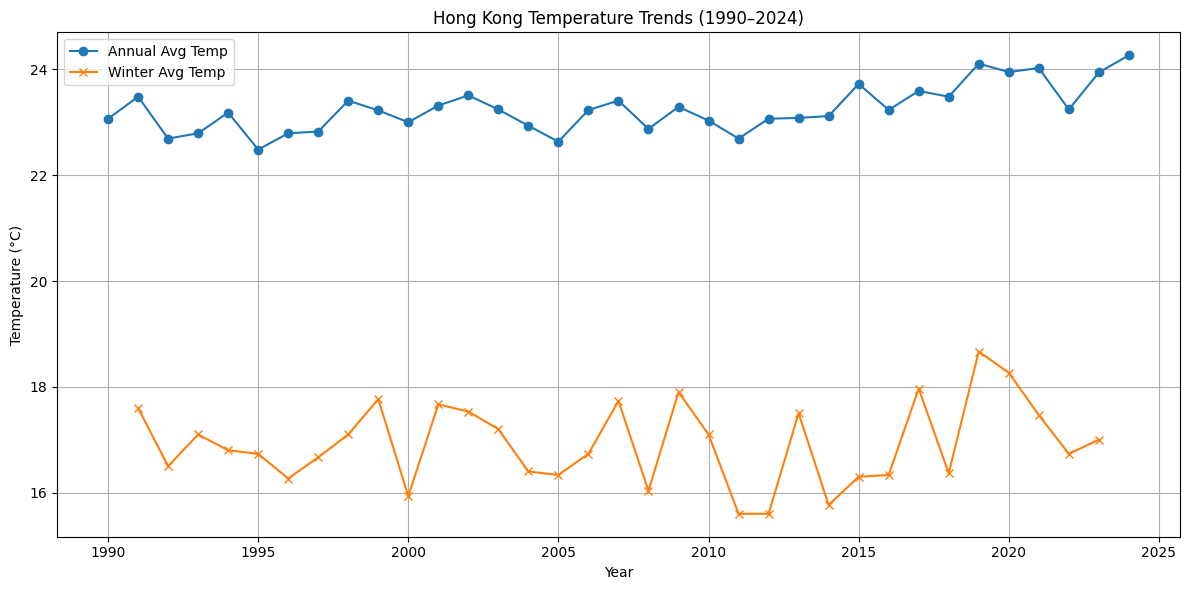

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Monthly

# 定義香港位置
hong_kong = Point(22.3193, 114.1694)

# 時間範圍
start = datetime(1990, 1, 1)
end = datetime(2024, 12, 31)

# 抓取每月資料
data = Monthly(hong_kong, start, end).fetch()

# 加入年份與月份欄位
data['year'] = data.index.year
data['month'] = data.index.month

# 計算每年平均氣溫
annual_avg_temp = data.groupby('year')['tavg'].mean()

# 計算每年冬季平均氣溫（前一年12月 + 當年1月、2月）
winter_temps = []
for year in range(1991, 2024):  # 從1991開始，因為需要前一年12月
    dec_prev = data[(data['year'] == year - 1) & (data['month'] == 12)]
    jan_feb = data[(data['year'] == year) & (data['month'].isin([1, 2]))]
    winter = pd.concat([dec_prev, jan_feb])
    winter_avg = winter['tavg'].mean()
    winter_temps.append((year, winter_avg))

winter_df = pd.DataFrame(winter_temps, columns=['Year', 'Winter Avg Temp'])

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp.index, annual_avg_temp.values, label='Annual Avg Temp', marker='o')
plt.plot(winter_df['Year'], winter_df['Winter Avg Temp'], label='Winter Avg Temp', marker='x')
plt.title('Hong Kong Temperature Trends (1990–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from datetime import datetime
import pandas as pd
from meteostat import Point, Monthly

# 定義香港位置
hong_kong = Point(22.3193, 114.1694)

# 時間範圍（包含1989年12月以計算1990年冬季）
start = datetime(1989, 12, 1)
end = datetime(2024, 12, 31)

# 抓取每月資料
data = Monthly(hong_kong, start, end).fetch()
data['year'] = data.index.year
data['month'] = data.index.month

# 計算每年四季平均氣溫
seasonal_data = []
for year in range(1990, 2025):
    spring = data[(data['year'] == year) & (data['month'].isin([3, 4, 5]))]
    summer = data[(data['year'] == year) & (data['month'].isin([6, 7, 8]))]
    autumn = data[(data['year'] == year) & (data['month'].isin([9, 10, 11]))]
    winter_dec = data[(data['year'] == year - 1) & (data['month'] == 12)]
    winter_janfeb = data[(data['year'] == year) & (data['month'].isin([1, 2]))]
    winter = pd.concat([winter_dec, winter_janfeb])

    seasonal_data.append({
        'Year': year,
        'Spring Avg Temp': spring['tavg'].mean(),
        'Summer Avg Temp': summer['tavg'].mean(),
        'Autumn Avg Temp': autumn['tavg'].mean(),
        'Winter Avg Temp': winter['tavg'].mean()
    })

seasonal_df = pd.DataFrame(seasonal_data)
print(seasonal_df)


    Year  Spring Avg Temp  Summer Avg Temp  Autumn Avg Temp  Winter Avg Temp
0   1990        21.500000        28.800000        25.000000        16.633333
1   1991        23.200000        28.633333        24.633333        17.600000
2   1992        21.566667        28.066667        24.400000        16.500000
3   1993        22.166667        28.300000        24.366667        17.100000
4   1994        22.900000        27.466667        24.666667        16.800000
5   1995        21.900000        27.700000        24.433333        16.733333
6   1996        21.233333        28.300000        25.066667        16.266667
7   1997        22.466667        27.400000        24.633333        16.666667
8   1998        22.900000        28.433333        25.133333        17.100000
9   1999        22.666667        28.200000        24.966667        17.766667
10  2000        22.466667        28.233333        24.633333        15.933333
11  2001        23.033333        28.000000        24.833333        17.666667

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from meteostat import Point, Monthly
import os

# 定義香港位置
hong_kong = Point(22.3193, 114.1694)

# 時間範圍（包含1989年12月以計算1990年冬季）
start = datetime(1989, 12, 1)
end = datetime(2024, 12, 31)

# 抓取每月資料
data = Monthly(hong_kong, start, end).fetch()
data['year'] = data.index.year
data['month'] = data.index.month

# 計算每年四季平均氣溫
seasonal_data = []
for year in range(1990, 2025):
    spring = data[(data['year'] == year) & (data['month'].isin([3, 4, 5]))]
    summer = data[(data['year'] == year) & (data['month'].isin([6, 7, 8]))]
    autumn = data[(data['year'] == year) & (data['month'].isin([9, 10, 11]))]
    winter_dec = data[(data['year'] == year - 1) & (data['month'] == 12)]
    winter_janfeb = data[(data['year'] == year) & (data['month'].isin([1, 2]))]
    winter = pd.concat([winter_dec, winter_janfeb])

    seasonal_data.append({
        'Year': year,
        'Spring Avg Temp': spring['tavg'].mean(),
        'Summer Avg Temp': summer['tavg'].mean(),
        'Autumn Avg Temp': autumn['tavg'].mean(),
        'Winter Avg Temp': winter['tavg'].mean()
    })



In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/hong_kong_seasonal_temperatures_1990_2024.png'

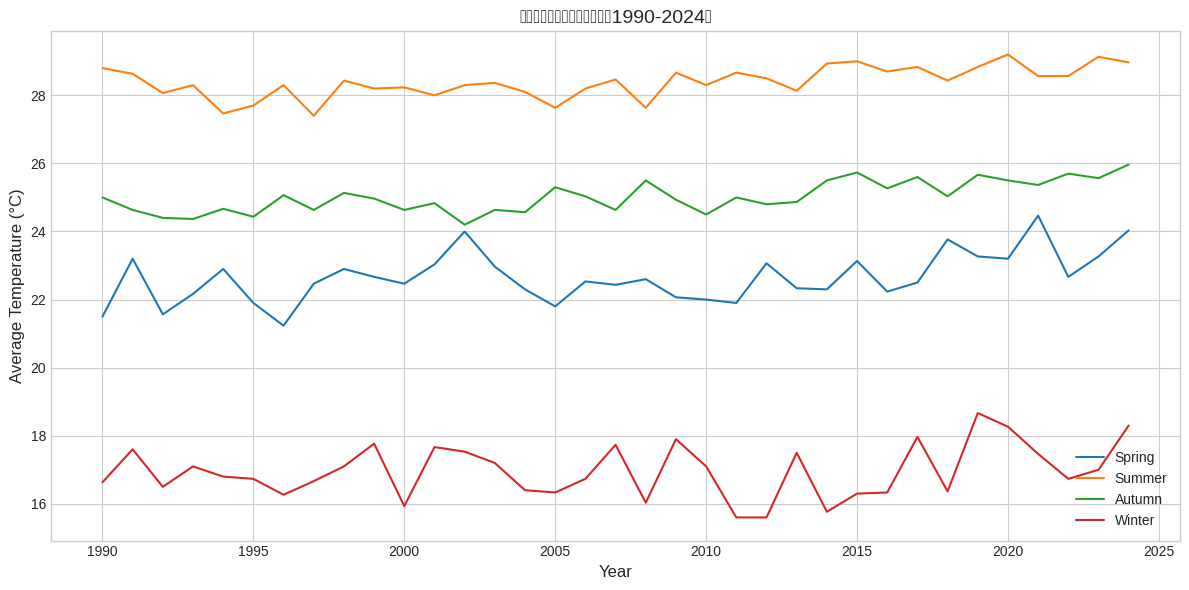

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

seasonal_df = pd.DataFrame(seasonal_data)

# 繪製折線圖
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df['Year'], seasonal_df['Spring Avg Temp'], label='Spring')
plt.plot(seasonal_df['Year'], seasonal_df['Summer Avg Temp'], label='Summer')
plt.plot(seasonal_df['Year'], seasonal_df['Autumn Avg Temp'], label='Autumn')
plt.plot(seasonal_df['Year'], seasonal_df['Winter Avg Temp'], label='Winter')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('香港每年四季平均氣溫變化（1990-2024）', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 儲存圖檔
output_path = '/mnt/data/hong_kong_seasonal_temperatures_1990_2024.png'
plt.savefig(output_path)
print("Seasonal temperature trend chart saved as:", output_path)
